# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# before Label Encode
app_train[['FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE']].head()

,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_CONTRACT_TYPE
0,Y,N,Cash loans
1,N,N,Cash loans
2,Y,Y,Revolving loans
3,Y,N,Cash loans
4,Y,N,Cash loans


In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])
            print('col:{} >> LabelEncode'.format(col))
print(app_train.shape)
app_train.head()

col:NAME_CONTRACT_TYPE >> LabelEncode
col:FLAG_OWN_CAR >> LabelEncode
col:FLAG_OWN_REALTY >> LabelEncode
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#check Label encoder
app_train[['FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE']].head()

,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_CONTRACT_TYPE
0,1,0,0
1,0,0,0
2,1,1,1
3,1,0,0
4,1,0,0


In [6]:
app_train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [7]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [8]:
app_train[['DAYS_EMPLOYED', 'DAYS_EMPLOYED_ANOM']].head(10)

,DAYS_EMPLOYED,DAYS_EMPLOYED_ANOM
0,-637.0,False
1,-1188.0,False
2,-225.0,False
3,-3039.0,False
4,-3038.0,False
5,-1588.0,False
6,-3130.0,False
7,-449.0,False
8,NaN,True
9,-2019.0,False


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [9]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [48]:
total_corr = app_train.corr()

In [92]:
corr_feature

{'pos': 0.9984895425113564,
 'neg': -0.6198876962018092,
 'pos_feat': 'OBS_60_CNT_SOCIAL_CIRCLE    0.99849\nName: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64_OBS_30_CNT_SOCIAL_CIRCLE',
 'neg_feat': 'DAYS_EMPLOYED_ANOM   -0.999868\nName: FLAG_EMP_PHONE, dtype: float64_FLAG_EMP_PHONE'}

In [91]:
corr_feature = {'pos':0, 'neg':0, 'pos_feat':'empty', 'neg_feat':'empty'}
for col in total_corr.columns:
    print("**{}**:\nneg_max_corr:\t{}\npos_max_corr:\t{}".format(col, total_corr[col].sort_values()[0:1],
                                                                 total_corr[col].sort_values()[-2:-1]))
    if total_corr[col].sort_values()[1] < corr_feature['neg'] and total_corr[col].sort_values()[1]!= -1 :
        corr_feature['neg'] = total_corr[col].sort_values()[1]
        corr_feature['neg_feat'] = str(total_corr[col].sort_values()[0:1]) + "_" + col
    if total_corr[col].sort_values()[-2] > corr_feature['pos'] and total_corr[col].sort_values()[-2]!=1 :
        corr_feature['pos'] = total_corr[col].sort_values()[-2]
        corr_feature['pos_feat'] = str(total_corr[col].sort_values()[-2:-1]) + "_" + col
    

**SK_ID_CURR**:
neg_max_corr:	FLAG_DOCUMENT_4   -0.004139
Name: SK_ID_CURR, dtype: float64
pos_max_corr:	YEARS_BUILD_AVG    0.0059
Name: SK_ID_CURR, dtype: float64
**TARGET**:
neg_max_corr:	EXT_SOURCE_3   -0.178919
Name: TARGET, dtype: float64
pos_max_corr:	DAYS_EMPLOYED    0.074958
Name: TARGET, dtype: float64
**NAME_CONTRACT_TYPE**:
neg_max_corr:	FLAG_DOCUMENT_3   -0.479724
Name: NAME_CONTRACT_TYPE, dtype: float64
pos_max_corr:	FLAG_OWN_REALTY    0.067177
Name: NAME_CONTRACT_TYPE, dtype: float64
**FLAG_OWN_CAR**:
neg_max_corr:	DAYS_EMPLOYED_ANOM   -0.154778
Name: FLAG_OWN_CAR, dtype: float64
pos_max_corr:	FLAG_OWN_CAR    1.0
Name: FLAG_OWN_CAR, dtype: float64
**FLAG_OWN_REALTY**:
neg_max_corr:	FLAG_WORK_PHONE   -0.114043
Name: FLAG_OWN_REALTY, dtype: float64
pos_max_corr:	DAYS_BIRTH    0.119146
Name: FLAG_OWN_REALTY, dtype: float64
**CNT_CHILDREN**:
neg_max_corr:	DAYS_BIRTH   -0.330938
Name: CNT_CHILDREN, dtype: float64
pos_max_corr:	CNT_FAM_MEMBERS    0.879161
Name: CNT_CHILDREN, dt

**ENTRANCES_MEDI**:
neg_max_corr:	DAYS_REGISTRATION   -0.062599
Name: ENTRANCES_MEDI, dtype: float64
pos_max_corr:	ENTRANCES_AVG    0.996886
Name: ENTRANCES_MEDI, dtype: float64
**FLOORSMAX_MEDI**:
neg_max_corr:	REGION_RATING_CLIENT_W_CITY   -0.247944
Name: FLOORSMAX_MEDI, dtype: float64
pos_max_corr:	FLOORSMAX_AVG    0.997034
Name: FLOORSMAX_MEDI, dtype: float64
**FLOORSMIN_MEDI**:
neg_max_corr:	REGION_RATING_CLIENT_W_CITY   -0.234853
Name: FLOORSMIN_MEDI, dtype: float64
pos_max_corr:	FLOORSMIN_MEDI    1.0
Name: FLOORSMIN_MEDI, dtype: float64
**LANDAREA_MEDI**:
neg_max_corr:	REGION_POPULATION_RELATIVE   -0.052547
Name: LANDAREA_MEDI, dtype: float64
pos_max_corr:	LANDAREA_AVG    0.99161
Name: LANDAREA_MEDI, dtype: float64
**LIVINGAPARTMENTS_MEDI**:
neg_max_corr:	REGION_RATING_CLIENT_W_CITY   -0.176934
Name: LIVINGAPARTMENTS_MEDI, dtype: float64
pos_max_corr:	LIVINGAPARTMENTS_MEDI    1.0
Name: LIVINGAPARTMENTS_MEDI, dtype: float64
**LIVINGAREA_MEDI**:
neg_max_corr:	REGION_RATING_CLIENT_

In [10]:
check_corr = app_train.corr()['TARGET']
check_corr_sorted = check_corr.sort_values()

In [11]:
pos_top15_corr = check_corr_sorted[:15]
neg_top15_corr = check_corr_sorted[-15:]

In [12]:
pos_top15_corr, neg_top15_corr

(EXT_SOURCE_3                 -0.178919
 EXT_SOURCE_2                 -0.160472
 EXT_SOURCE_1                 -0.155317
 DAYS_BIRTH                   -0.078239
 DAYS_EMPLOYED_ANOM           -0.045987
 FLOORSMAX_AVG                -0.044003
 FLOORSMAX_MEDI               -0.043768
 FLOORSMAX_MODE               -0.043226
 AMT_GOODS_PRICE              -0.039645
 REGION_POPULATION_RELATIVE   -0.037227
 ELEVATORS_AVG                -0.034199
 ELEVATORS_MEDI               -0.033863
 FLOORSMIN_AVG                -0.033614
 FLOORSMIN_MEDI               -0.033394
 LIVINGAREA_AVG               -0.032997
 Name: TARGET, dtype: float64, DEF_60_CNT_SOCIAL_CIRCLE       0.031276
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
 LIVE_CITY_NOT_WORK_CITY        0.032518
 OWN_CAR_AGE                    0.037612
 DAYS_REGISTRATION              0.041975
 FLAG_DOCUMENT_3                0.044346
 REG_CITY_NOT_LIVE_CITY         0.044395
 FLAG_EMP_PHONE                 0.045982
 REG_CITY_NOT_WORK_CITY         0.050994
 

fail col: DAYS_EMPLOYED_ANOM


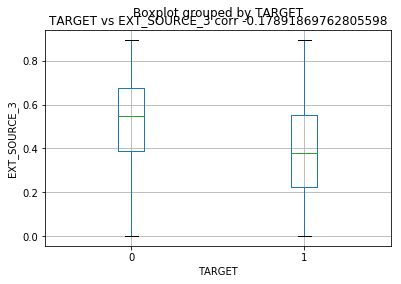

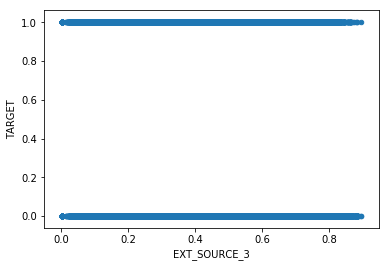

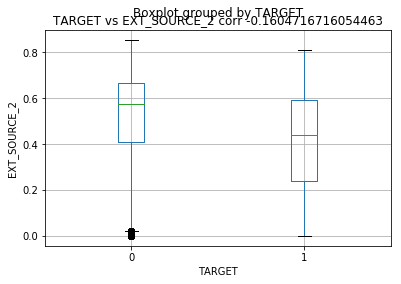

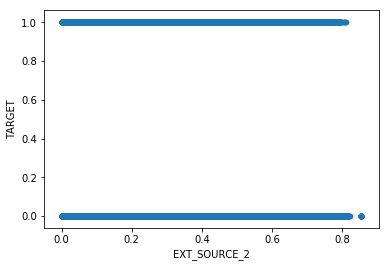

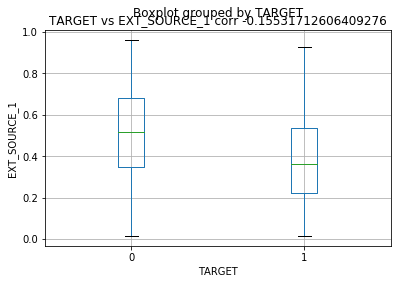

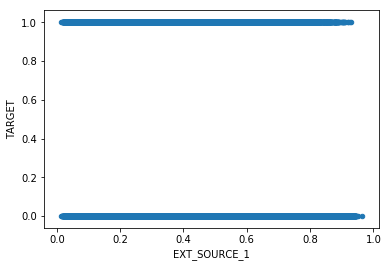

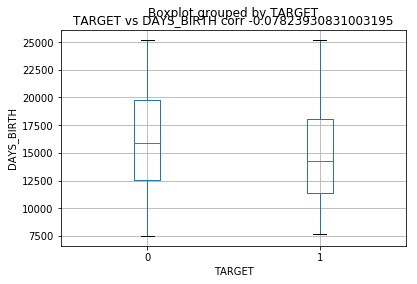

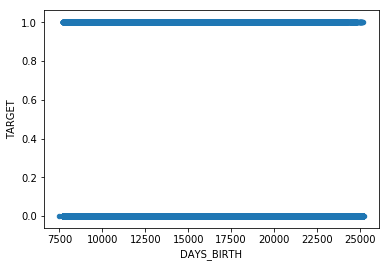

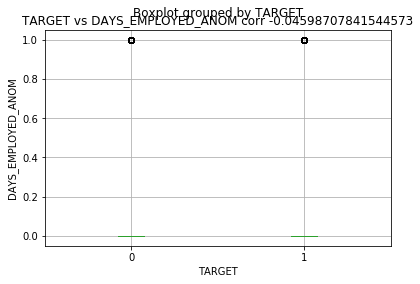

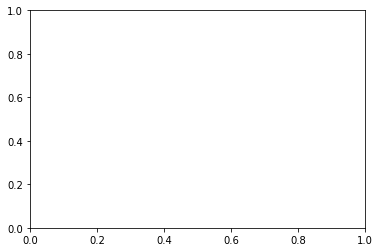

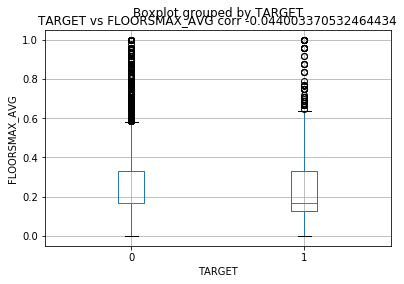

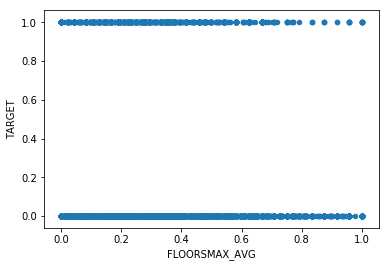

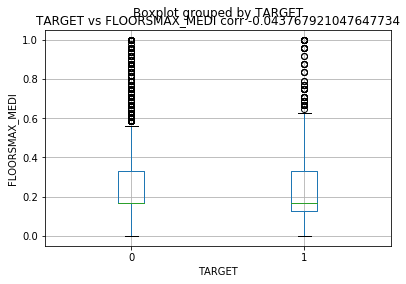

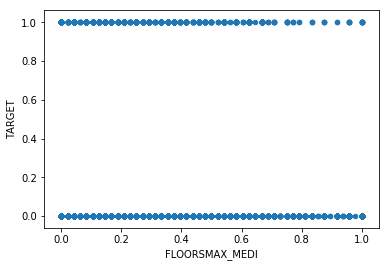

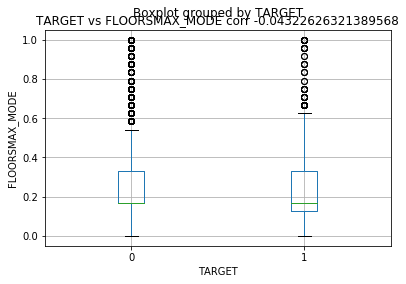

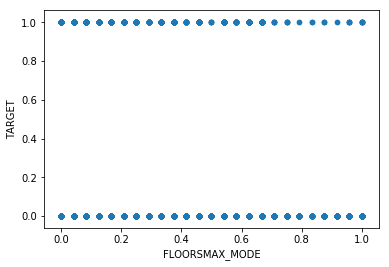

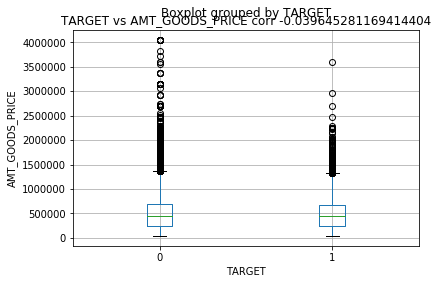

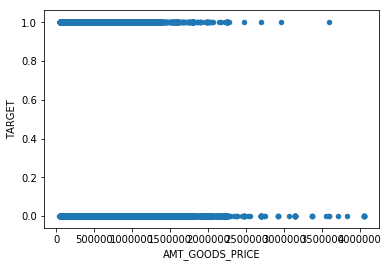

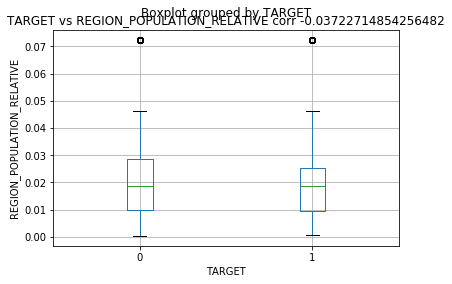

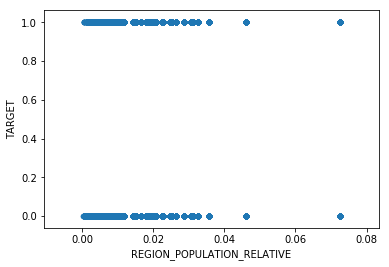

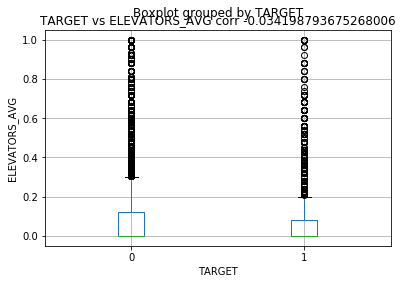

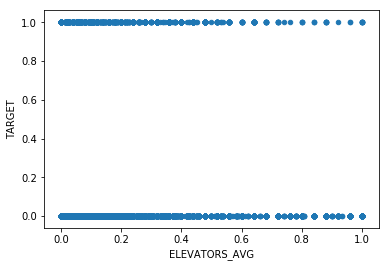

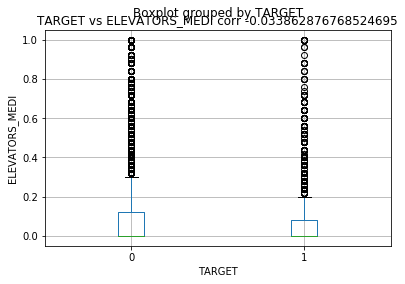

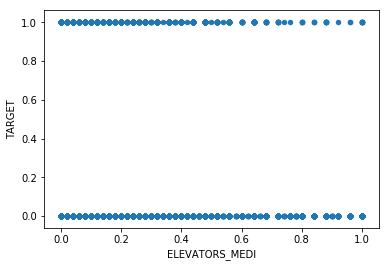

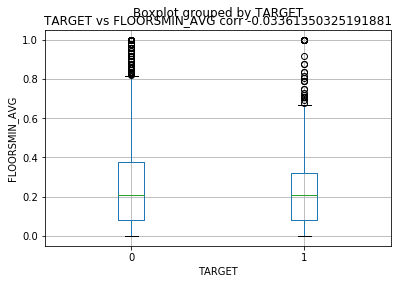

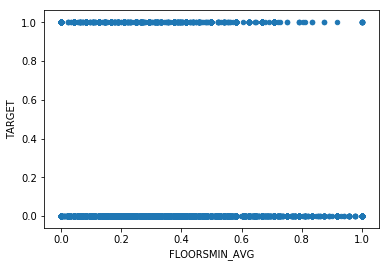

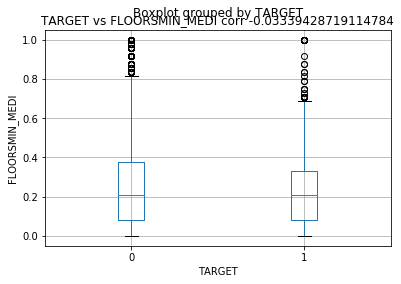

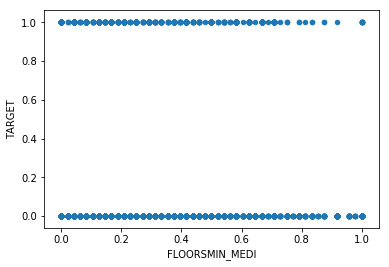

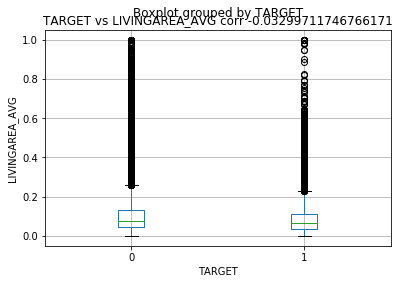

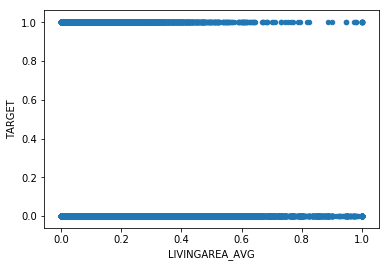

In [45]:
# top15_picture
for col, corr_num in zip(list(pos_top15_corr.index), pos_top15_corr.values):
    try:
        #plt.subplot(121)
        app_train.boxplot(column=col, by='TARGET')
        plt.xlabel('TARGET'), plt.ylabel(col)
        plt.title('TARGET vs {} corr {}'.format(col, corr_num))
        #plt.subplot(122)
        app_train.plot(x=col, y='TARGET', kind = 'scatter')
    except: 
        print('fail col:',col)